## Optimization Task with an example 2D functions

    """
    Two-dimensional ThreeHumpCamel function, often used as an optimization benchmark.
    Based on: https://www.sfu.ca/~ssurjano/camel3.html
    input variable range: ('x1', -2, 2),('x2', -2, 2)
    minimum f(x*) = 0 at x* = (0, 0)
    
    """

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def threehumpcamel_function(x):
    """
    Two-dimensional ThreeHumpCamel function, often used as an optimization benchmark.
    Based on: https://www.sfu.ca/~ssurjano/camel3.html
    input variable range: ('x1', -2, 2),('x2', -2, 2)
    minimum f(x*) = 0 at x* = (0, 0)
    
    """
    x1 = x[:,0]
    x2 = x[:,1]
    term1 = 2 * x1 ** 2 -1.05 * x1 ** 4 + x1**6/6 
    term2 = x1 * x2
    term3 = x2 ** 2
    y = term1 + term2 + term3
    return np.transpose([y])

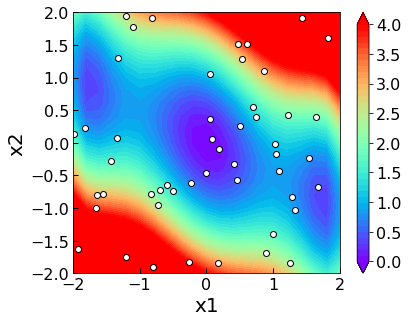

In [79]:
f = threehumpcamel_function

nx1, nx2 = (21, 21)
x1 = np.linspace(-2, 2, nx1)
x2 = np.linspace(-2, 2, nx2)
x1v, x2v = np.meshgrid(x1, x2)
xv = [np.transpose([x1v[i],x2v[i]]) for i in range(len(x1v))]
y = [f(xv[i])[:,-1] for i in range(len(xv))]

rng = np.random.RandomState(10)
num_samples = 50
x_train = (np.transpose([rng.rand(num_samples, 1), rng.rand(num_samples, 1)])[0]-0.5)*4
y_train = f(x_train).ravel()


fs= 20
plt.subplots(figsize = (6, 4.8))
c_plt = plt.contourf(x1v, x2v, y,levels = np.arange(41)*0.1, cmap='rainbow', extend = 'both')# 
cbar = plt.colorbar(c_plt)
cbar.ax.tick_params(labelsize=fs*0.8)
plt.xlabel('x1',fontsize = fs)
plt.ylabel('x2',fontsize = fs)
plt.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
plt.scatter(x_train[:,0], x_train[:,1], c = 'white', alpha = 1, edgecolor = 'black')

plt.show()


### When we have data available, let's build a regression model 

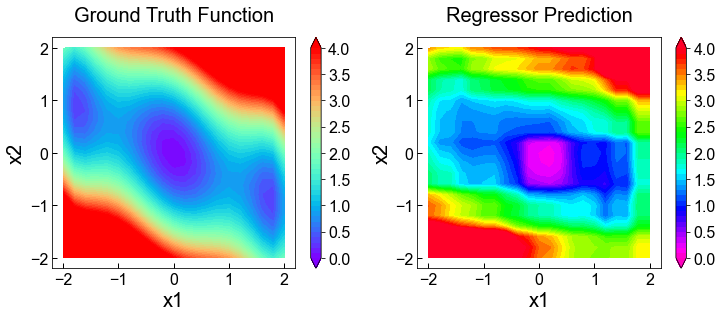

In [130]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, Matern


regressor_rf = RandomForestRegressor()
regressor_gb = GradientBoostingRegressor()
regressor_gp = GaussianProcessRegressor(kernel = Matern(2))
regressor = regressor_rf
regressor.fit(x_train, y_train)
#regressor.predict([[1,1]])


nx1, nx2 = (21, 21)
x1 = np.linspace(-2, 2, nx1)
x2 = np.linspace(-2, 2, nx2)
x1v, x2v = np.meshgrid(x1, x2)
xv = [np.transpose([x1v[i],x2v[i]]) for i in range(len(x1v))]
y = [f(xv[i])[:,-1] for i in range(len(xv))]
y_pred = [regressor.predict(xv[i]) for i in range(len(xv))]


fs= 20
fig, axes = plt.subplots(1,2, figsize = (6*2, 4.25))
i = 0
c_plt = axes[i].contourf(x1v, x2v, y, levels = np.arange(41)*0.1, cmap='rainbow', extend = 'both')# 
cbar = plt.colorbar(c_plt, ax = axes[i])
cbar.ax.tick_params(labelsize=fs*0.8)
axes[i].set_title('Ground Truth Function', fontsize =fs, pad = fs*0.8)
#axes[i].scatter(x_train[:,0], x_train[:,1], c = 'white', alpha = 1, edgecolor = 'black')

i = 1
c_plt = axes[i].contourf(x1v, x2v, y_pred,levels = np.arange(41)*0.1, cmap='gist_rainbow_r', extend = 'both')# 
cbar = plt.colorbar(c_plt, ax = axes[i])
cbar.ax.tick_params(labelsize=fs*0.8)
axes[i].set_title('Regressor Prediction', fontsize =fs, pad = fs*0.8)
#axes[i].scatter(x_train[:,0], x_train[:,1], c = 'white', alpha = 1, edgecolor = 'black')



for i in range(len(axes)):
    cbar.ax.tick_params(labelsize=fs*0.8)
    axes[i].set_xlabel('x1',fontsize = fs)
    axes[i].set_ylabel('x2',fontsize = fs)
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].set_xlim(-2.2, 2.2)
    axes[i].set_ylim(-2.2, 2.2)
    axes[i].set_xticks(np.arange(-2, 2.1, 1))
    axes[i].set_yticks(np.arange(-2, 2.1, 1))



### Conduct Particle Swarm Optimization to Find the Minimum 

In [131]:
from pyswarm import pso
upper_bounds = np.array([2, 2])
lower_bounds = np.array([-2,-2])
def objective(X):
    return regressor.predict(np.array([X]))[0]

X_opts = []
n_runs = 5
for n in range(n_runs):## repeat 5 times
    X_opt, _ = pso(
        objective, lower_bounds, upper_bounds, #f_ieqcons=constraints,
        swarmsize=10, maxiter=10)
    X_opts.append(X_opt)
X_opts = np.asarray(X_opts)
y_hat_opts = regressor.predict(X_opts).reshape(-1, 1)
data_opt = np.concatenate([X_opts, y_hat_opts], axis=1)
df_predict = pd.DataFrame(columns=['x1','x2','y'], data=np.round(data_opt,3))
df_predict

Stopping search: maximum iterations reached --> 10
Stopping search: maximum iterations reached --> 10
Stopping search: maximum iterations reached --> 10
Stopping search: maximum iterations reached --> 10
Stopping search: maximum iterations reached --> 10


,x1,x2,y
0,0.079,-0.079,0.125
1,0.080,-0.071,0.125
2,0.108,-0.069,0.121
3,0.134,-0.104,0.117
4,0.138,-0.084,0.114


#### Visualization Results

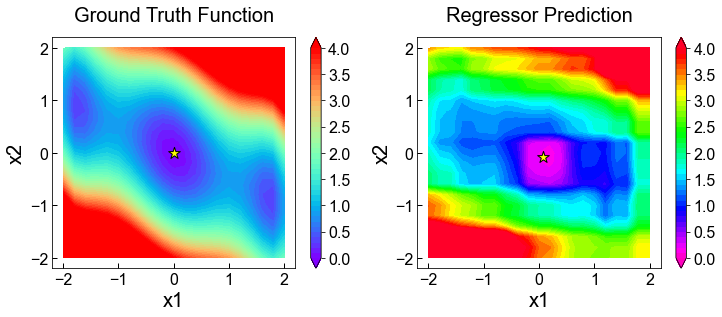

In [132]:
fs= 20
fig, axes = plt.subplots(1,2, figsize = (6*2, 4.25))
i = 0
c_plt = axes[i].contourf(x1v, x2v, y, levels = np.arange(41)*0.1, cmap='rainbow', extend = 'both')# 
cbar = plt.colorbar(c_plt, ax = axes[i])
cbar.ax.tick_params(labelsize=fs*0.8)
axes[i].set_title('Ground Truth Function', fontsize =fs, pad = fs*0.8)
axes[i].scatter(0, 0, marker = '*', s=150, c = 'yellow', alpha = 1, edgecolor = 'black')

i = 1
c_plt = axes[i].contourf(x1v, x2v, y_pred,levels = np.arange(41)*0.1, cmap='gist_rainbow_r', extend = 'both')# 
cbar = plt.colorbar(c_plt, ax = axes[i])
cbar.ax.tick_params(labelsize=fs*0.8)
axes[i].set_title('Regressor Prediction', fontsize =fs, pad = fs*0.8)
axes[i].scatter(X_opts[0,0], X_opts[0,1], marker = '*', s=150, c = 'yellow', alpha = 1, edgecolor = 'black')

for i in range(len(axes)):
    cbar.ax.tick_params(labelsize=fs*0.8)
    axes[i].set_xlabel('x1',fontsize = fs)
    axes[i].set_ylabel('x2',fontsize = fs)
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].set_xlim(-2.2, 2.2)
    axes[i].set_ylim(-2.2, 2.2)
    axes[i].set_xticks(np.arange(-2, 2.1, 1))
    axes[i].set_yticks(np.arange(-2, 2.1, 1))

### When we do not have data available, let's collect some data using Bayesian Optimization 
#### Active Learning, also know as Sequnetial Learning: Finding the optimum while actively collecting data

In [98]:
np.random.seed(234)
from GPyOpt.methods import BayesianOptimization
import GPy

x_bounds = [
           {'name': 'x1', 'type': 'continuous', 'domain': (-2,2)}, 
           {'name': 'x2', 'type': 'continuous', 'domain': (-2,2)}
         ]

Iteration Num = 1  (total sampling num: 4 )
Minimum Y = [2.083]  (at x* =: [1.5 0.5] )


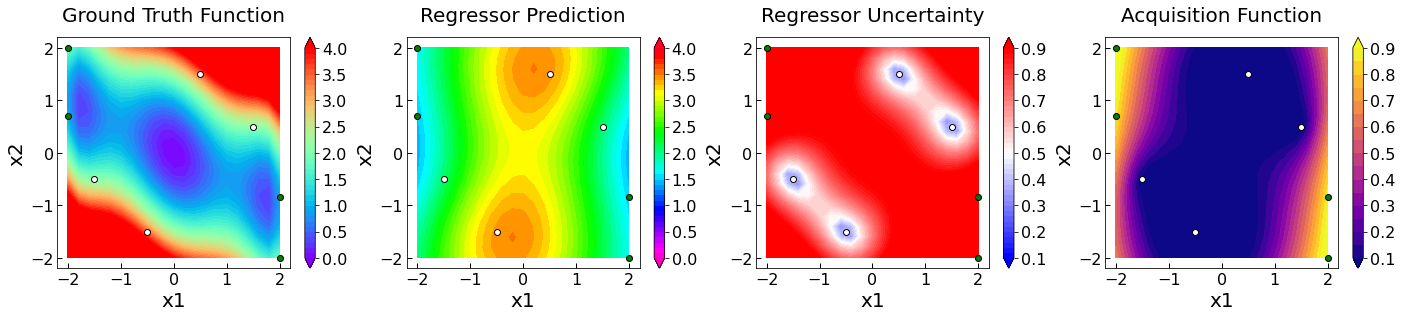

Iteration Num = 2  (total sampling num: 8 )
Minimum Y = [0.89]  (at x* =: [ 2.    -0.848] )


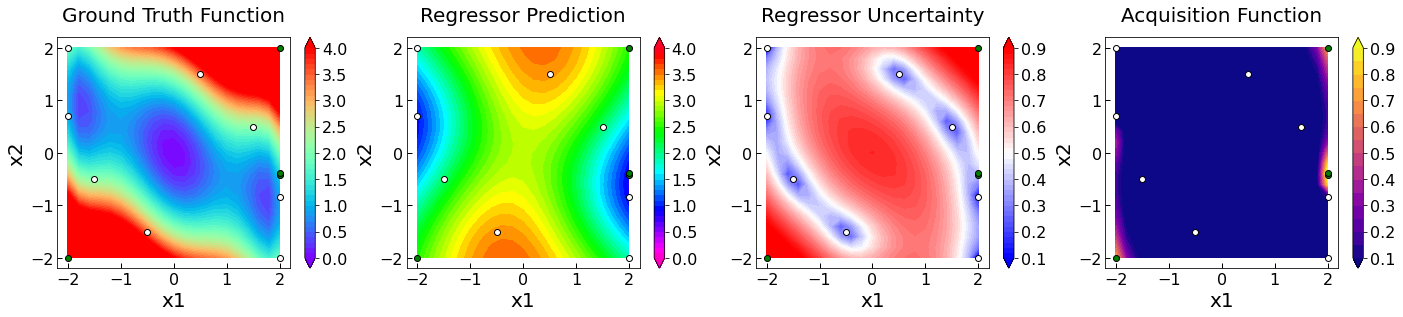

Iteration Num = 3  (total sampling num: 12 )
Minimum Y = [0.89]  (at x* =: [ 2.    -0.848] )


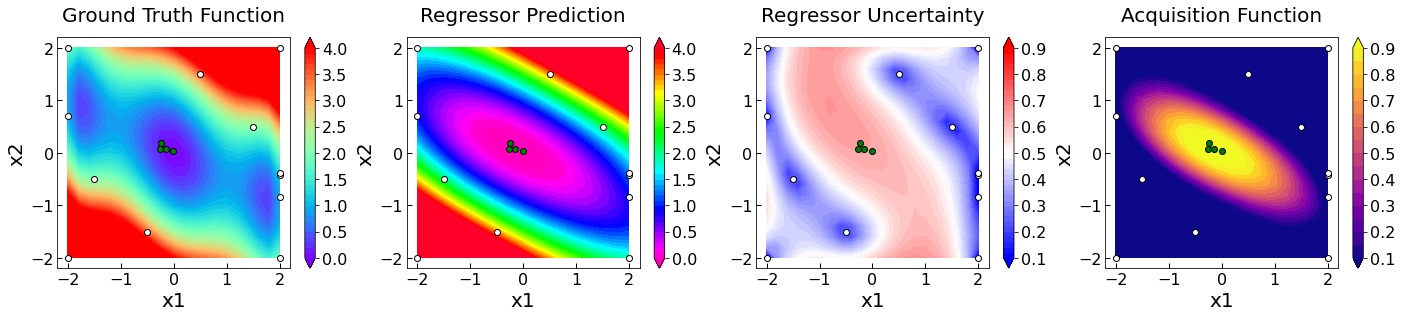

Iteration Num = 4  (total sampling num: 16 )
Minimum Y = [0.001]  (at x* =: [-0.006  0.032] )


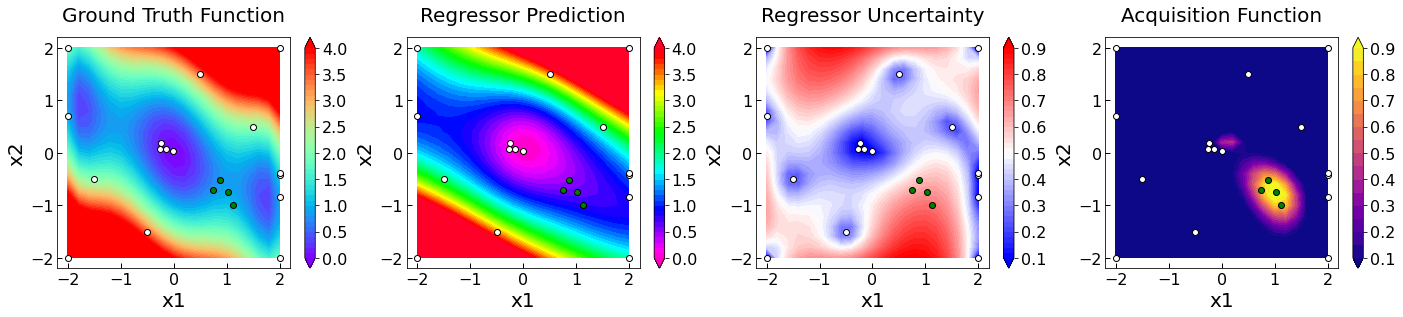

Iteration Num = 5  (total sampling num: 20 )
Minimum Y = [0.001]  (at x* =: [-0.006  0.032] )


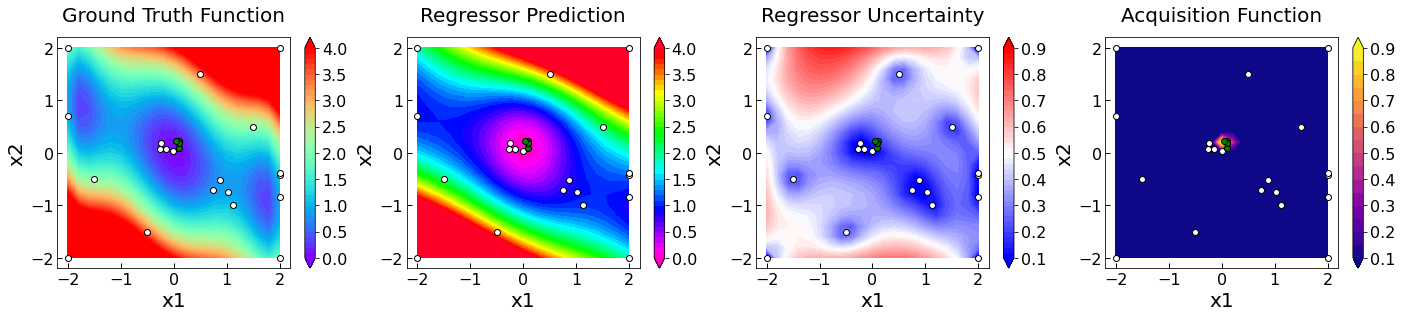

In [99]:
current_iter = 0
batchsize = 4
iter_count = int(20/batchsize)

X = np.array([[-0.5, -1.5],[ 1.5,  0.5],[ 0.5,  1.5],[-1.5, -0.5]])
Y = f(X) ## Replace by experimental data or data from complicated simulation

while current_iter < iter_count:
    #bo_step = GPyOpt.methods.BayesianOptimization(f = None, domain = domain, X = X_step, Y = Y_step, acquisition_type = 'EI')
    bayes_opt = BayesianOptimization(
                                     f=None, 
                                     X = X,
                                     Y = Y,
                                     domain=x_bounds,
                                     model_type='GP',
                                     initial_design_numdata = 4,
                                     initial_design_type = 'latin',#'random' ## initial sampling method 
                                     acquisition_type ='EI',#'LCB' ## acquisition method
                                     #acquisition_jitter = 1, 
                                     normalize_Y= False,
                                     maximize = False,
                                     exact_feval = True,#No noise in the function
                                     batch_size = batchsize,
                                     num_cores = 1,
                                     evaluator_type = 'local_penalization', ##the sample selection method in Batch mode##
                                     #kernel = GPy.kern.Matern52(input_dim = 2)
                                     )
    x_next = bayes_opt.suggest_next_locations()
    print("Iteration Num =", current_iter+1, ' (total sampling num:', len(X),')')
    print("Minimum Y =", np.round(Y[np.argmin(Y)], 3), ' (at x* =:', np.round(X[np.argmin(Y)],3),')')

    y_next = f(x_next)
    x_prev = X
    X = np.vstack((X, x_next))
    Y = np.vstack((Y, y_next))
    
    current_iter += 1
    
    
    nx1, nx2 = (21, 21)
    x1 = np.linspace(-2, 2, nx1)
    x2 = np.linspace(-2, 2, nx2)
    x1v, x2v = np.meshgrid(x1, x2)
    xv = [np.transpose([x1v[i],x2v[i]]) for i in range(len(x1v))]

    y = [f(xv[i])[:,-1] for i in range(len(xv))]

    y_pred, y_std = [],[]
    acqui_values = []
    for i in range(len(xv)):
        y_predi, y_stdi = bayes_opt.model.predict(xv[i])
        acqui_i = bayes_opt.acquisition.acquisition_function(xv[i])
        y_pred.append(y_predi[:,-1])
        y_std.append(y_stdi[:,-1])
        acqui_values.append(acqui_i[:,-1])

    fs= 20
    fig, axes = plt.subplots(1,4, figsize = (6*4, 4.25))

    i = 0
    c_plt = axes[i].contourf(x1v, x2v, y, levels = np.arange(41)*0.1, cmap='rainbow', extend = 'both')# 
    cbar = plt.colorbar(c_plt, ax = axes[i])
    cbar.ax.tick_params(labelsize=fs*0.8)
    axes[i].set_title('Ground Truth Function', fontsize =fs, pad = fs*0.8)
    axes[i].scatter(x_prev[:,0],x_prev[:,1],c = 'white', alpha = 1, edgecolor = 'black')
    axes[i].scatter(x_next[:,0],x_next[:,1],c = 'green', alpha = 1, edgecolor = 'black')


    i = 1
    c_plt = axes[i].contourf(x1v, x2v, y_pred,levels = np.arange(41)*0.1, cmap='gist_rainbow_r', extend = 'both')# 
    cbar = plt.colorbar(c_plt, ax = axes[i])
    cbar.ax.tick_params(labelsize=fs*0.8)
    axes[i].set_title('Regressor Prediction', fontsize =fs, pad = fs*0.8)
    axes[i].scatter(x_prev[:,0],x_prev[:,1],c = 'white', alpha = 1, edgecolor = 'black')
    axes[i].scatter(x_next[:,0],x_next[:,1],c = 'green', alpha = 1, edgecolor = 'black')


    i = 2
    c_plt = axes[i].contourf(x1v, x2v, np.sqrt(y_std),levels = np.arange(41)*0.02+0.1, cmap='bwr', extend = 'both')# 
    cbar = plt.colorbar(c_plt, ax = axes[i])
    cbar.ax.tick_params(labelsize=fs*0.8)
    axes[i].set_title('Regressor Uncertainty', fontsize =fs, pad = fs*0.8)
    axes[i].scatter(x_prev[:,0],x_prev[:,1],c = 'white', alpha = 1, edgecolor = 'black')
    axes[i].scatter(x_next[:,0],x_next[:,1],c = 'green', alpha = 1, edgecolor = 'black')
    
    i = 3
    c_plt = axes[i].contourf(x1v, x2v, acqui_values/np.min(acqui_values), levels = np.arange(17)*0.05+0.1,cmap='plasma', extend = 'both')
    cbar = plt.colorbar(c_plt, ax = axes[i])
    cbar.ax.tick_params(labelsize=fs*0.8)
    axes[i].set_title('Acquisition Function', fontsize =fs, pad = fs*0.8)
    axes[i].scatter(x_prev[:,0],x_prev[:,1],c = 'white', alpha = 1, edgecolor = 'black')
    axes[i].scatter(x_next[:,0],x_next[:,1],c = 'green', alpha = 1, edgecolor = 'black')


    for i in range(len(axes)):
        cbar.ax.tick_params(labelsize=fs*0.8)
        axes[i].set_xlabel('x1',fontsize = fs)
        axes[i].set_ylabel('x2',fontsize = fs)
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].set_xlim(-2.2, 2.2)
        axes[i].set_ylim(-2.2, 2.2)
        axes[i].set_xticks(np.arange(-2, 2.1, 1))
        axes[i].set_yticks(np.arange(-2, 2.1, 1))

    plt.subplots_adjust(wspace = 0.2)
    plt.show()


Minimum Y = [0.001] at x*= [-0.006  0.032]


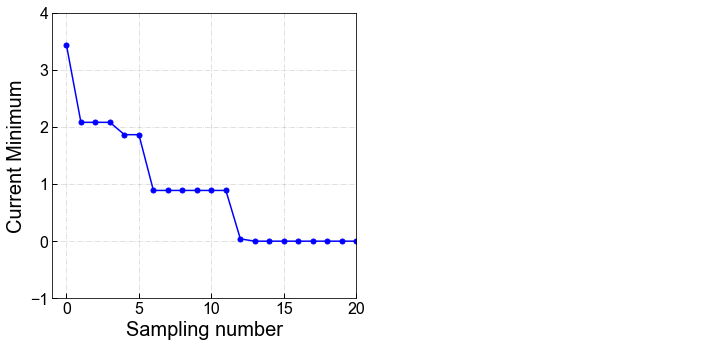

In [124]:
print('Minimum Y =', np.round(Y[np.argmin(Y)],3), 'at x*=', np.round(X[np.argmin(Y)],3))

plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
fig, axes = plt.subplots(1,2, figsize = (6*2, 5.25))
axes[0].plot(np.arange(len(X)), np.minimum.accumulate(np.transpose(Y)[0]), 
         marker = 'o', ms = 5, c = 'blue')
axes[0].set_ylabel('Current Minimum', fontsize = 20)
axes[0].set_xlabel('Sampling number', fontsize = 20)
axes[0].set_ylim(-1, 4)
axes[0].set_xlim(-1, 20)

for i in range(len(axes)):
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
axes[1].axis('off')
plt.show()